
# <span style="color:rgb(213,80,0)">**Heat Transfer in a Rod with a Source and Convection**</span>

Consider a 0.5\-meter long copper rod. One end is held at a high temperature, while the other end is insulated.


The rod has an internal heat source (like an electric current running through it) but is also losing heat to the surrounding air through convection.


We want to find the temperature distribution T(x,t) in the rod over time.

<p style="text-align:left">
   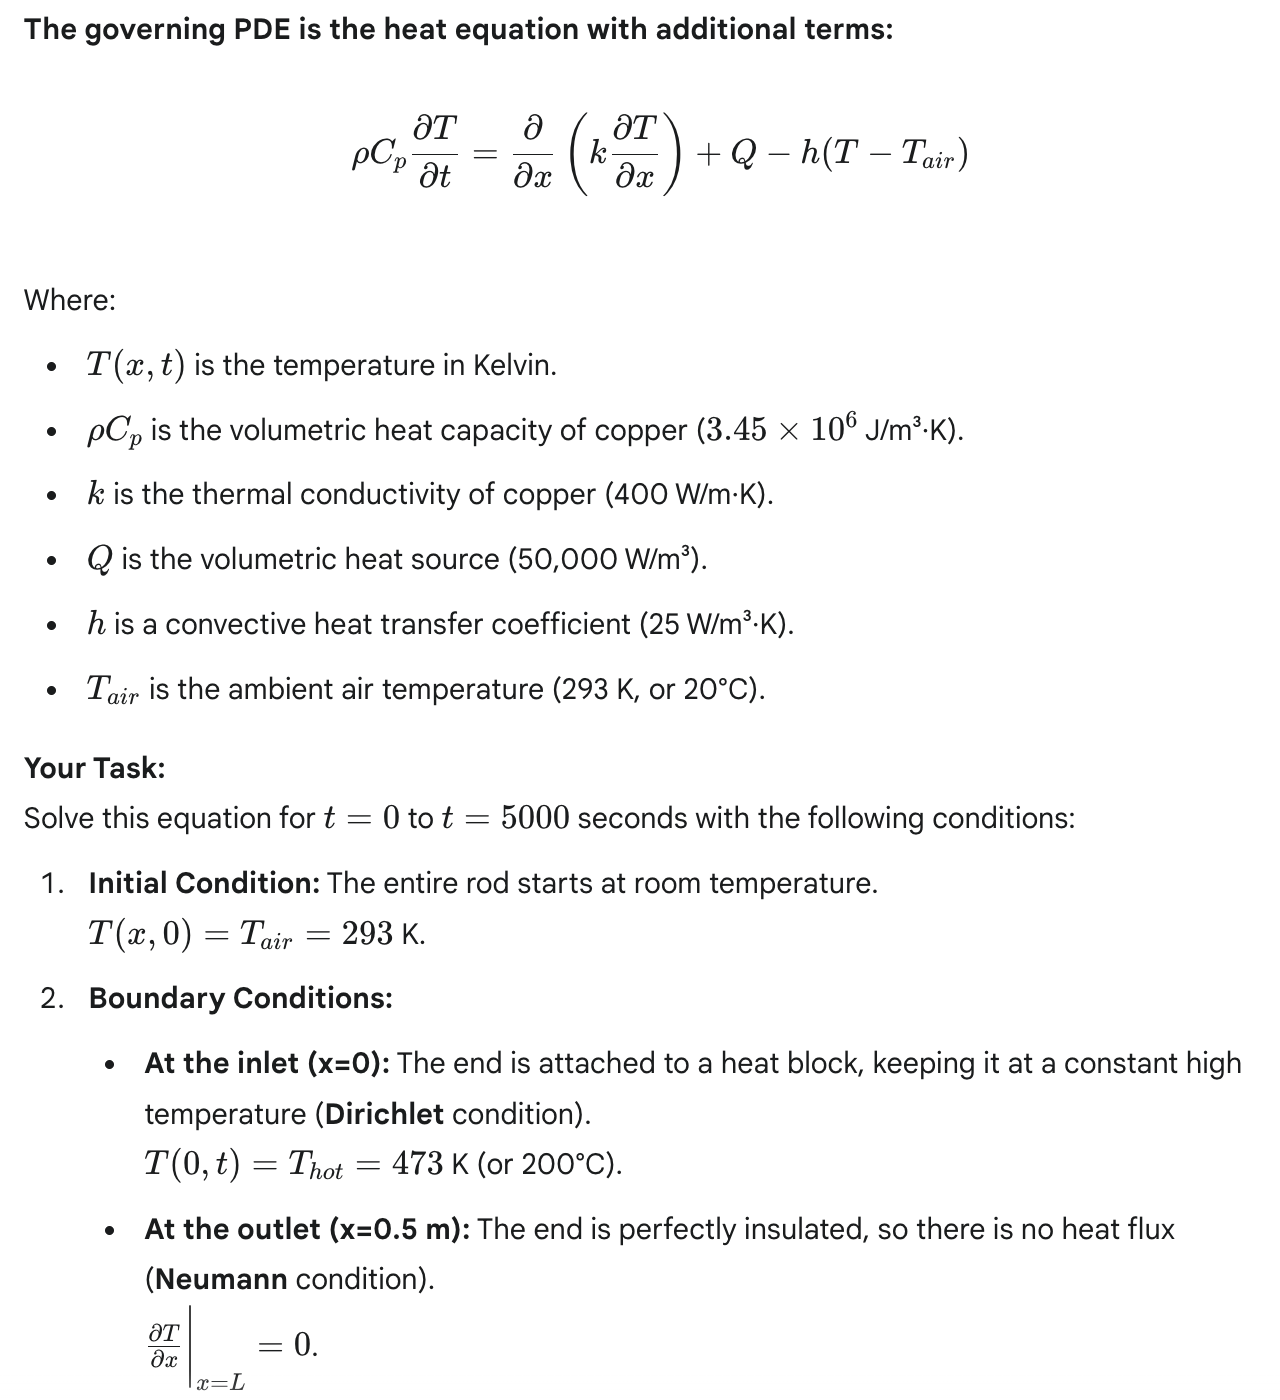
</p>



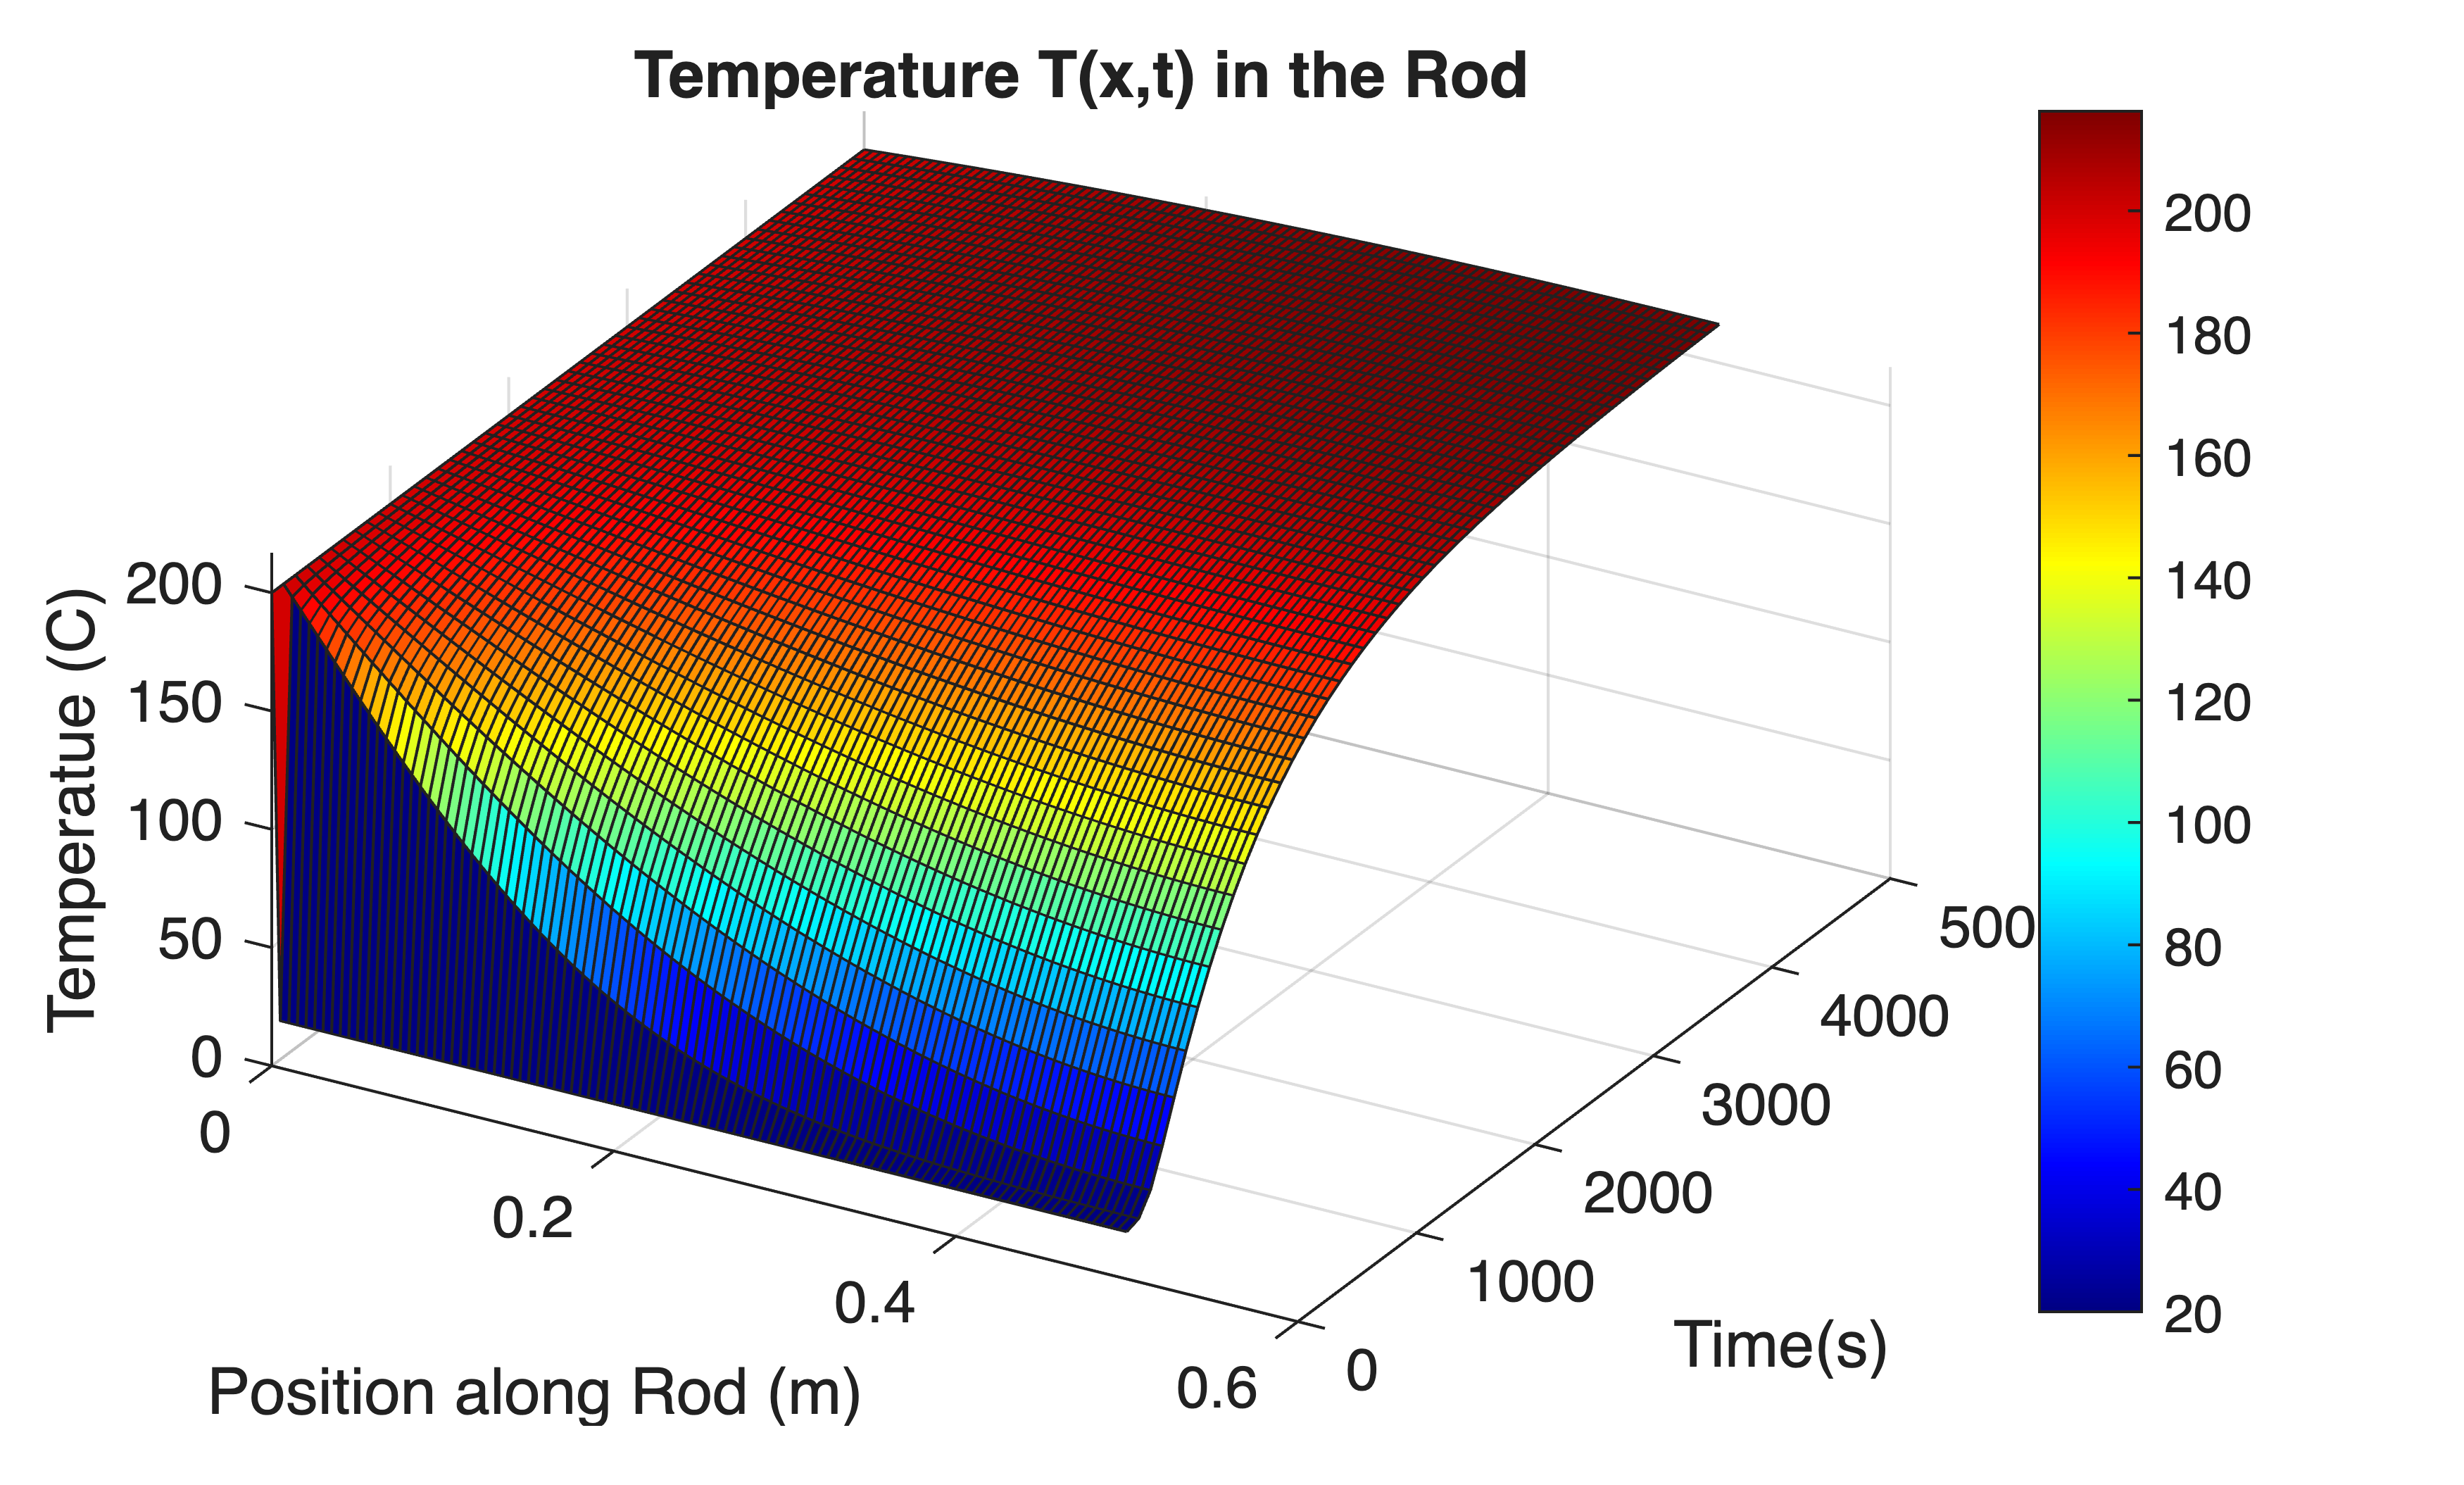

In [1]:
clc; clearvars; close all;

function [c,f,s] = heatPDE(x,t,T,dTdx)
    c = 3.45 * 10^(6);
    f = 400 * dTdx;
    s = 50000 + 25*(T-293);
end

function T0 = heatIC(x)
    T0 = 293;
end

function [pl,ql,pr,qr] = heatBC(xl,ul,xr,ur,t)
    pl = ul - 473;
    ql = 0;
    pr = 0;
    qr = 1;
end

m = 0;
L = 0.5;
xmesh = linspace(0,L,101);
tspan = linspace(0,5000,51);

sol = pdepe(m, @heatPDE, @heatIC, @heatBC, xmesh, tspan);

T = sol(:,:,1)-273;

figure;
surf(xmesh, tspan, T);
xlabel("Position along Rod (m)");
ylabel("Time(s)");
zlabel("Temperatue (C)");
title("Temperature T(x,t) in the Rod");
colorbar;
colormap("jet");
view(30, 45);